# Project: Visualizing Data with Seaborn (Titanic survival data)

## Questions to address:
- What was the distribution of Ages for passengers for different classes, different survival outcomes and different genders?

## Tools:
- Seaborn kdeplot
- Seaborn FacetGrid
- jointplot

<br>

### load defaults

In [1]:
import pandas as pd
import re
import numpy as np

from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams

from functions import *

plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green']

## Dataset: Titanic Survival Data

In [2]:
titanic = pd.read_csv('./data/train.csv')
#remove columns with too many missing values
titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)
titanic.dropna(axis=0, how='any', inplace = True)

<b>Variables available:</b>

In [3]:
for element in titanic.columns:
    print("%s | " % element, end='')

Survived | Pclass | Sex | Age | SibSp | Parch | Fare | Embarked | 

<b>DF snipet:</b>

In [4]:
display(titanic.iloc[:3])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


<br>

## Analysis:

### Q1: What was the distribution the passenger ages?

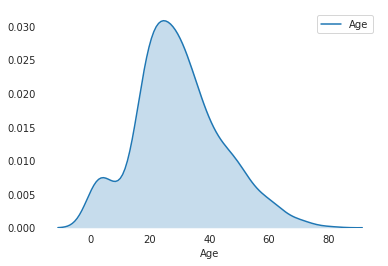

In [6]:
import seaborn as sns

sns.set_style('white')
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')

sns.despine(left=True, bottom=True)
plt.show()

- Mean Age ~35

<br>

### Q2: What was the distribution of Ages for passengers in different classes?

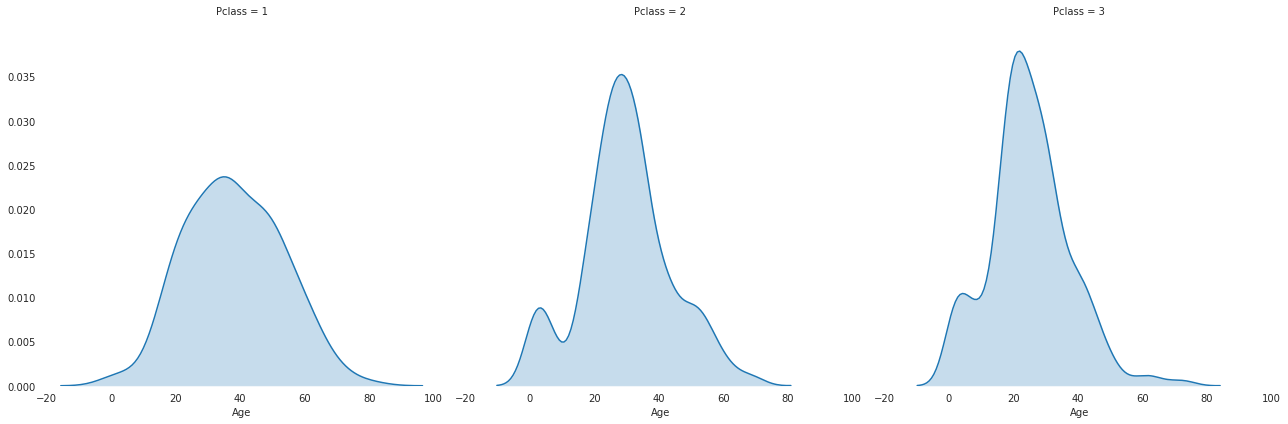

In [7]:
grid = sns.FacetGrid(titanic, col='Pclass', height=6) 
grid.map(sns.kdeplot, 'Age', shade=True)
sns.despine(left=True, bottom=True)
plt.show()

- Older passengers in higher class (Pclass=1)

<br>

### Q3: What was the distribution of Ages for passengers in different classes that survived or not?

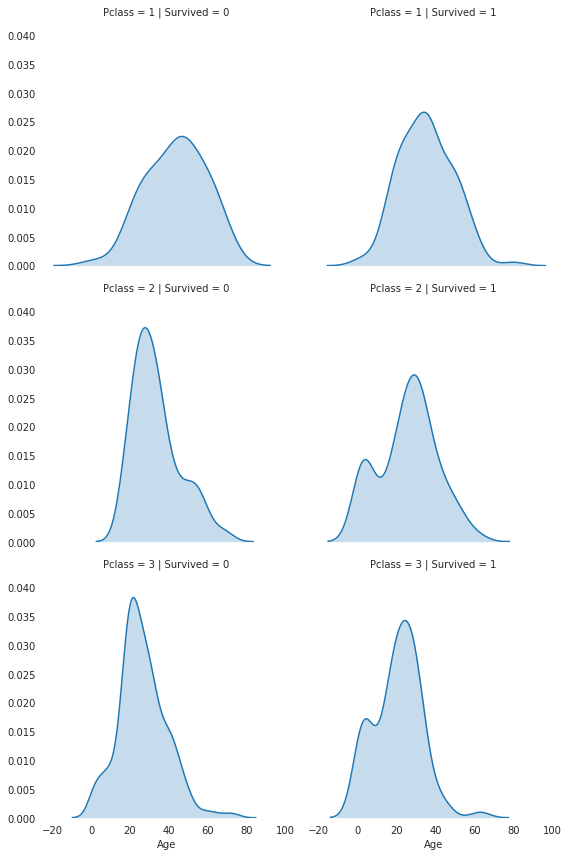

In [11]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', height=4)
grid.map(sns.kdeplot, 'Age', shade=True)
sns.despine(left=True, bottom=True)
plt.show()

- For Pclass = 1, survived and not survived ages looked the same (slightly younger survived). 
- For Pclass = 2 and 3, older survived.

<br>

### Q4: What was the distribution of Ages for passengers in different classes that survived or not separated by gender?

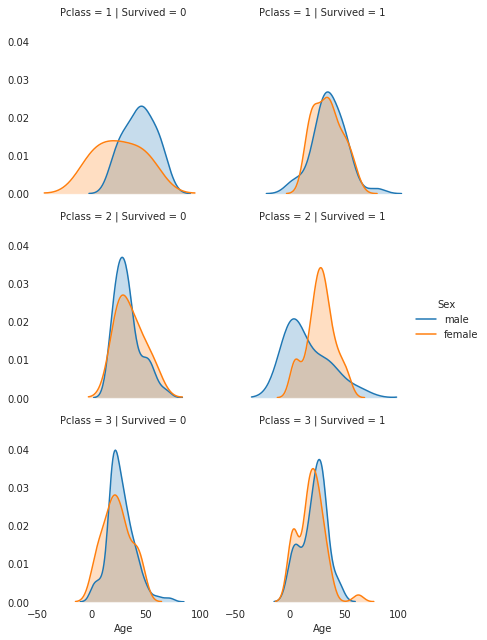

In [12]:
#we can add a condition just by setting the hue parameter
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', hue='Sex', height=3)
grid.map(sns.kdeplot, 'Age', shade=True)
grid.add_legend()
#grid = grid.map(sns.kdeplot, 'Age', shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

- In Pclass = 1, there were more younger women and these did not survived. 
- In Pclass = 2 Women older than Men survived.

<br>

### Q5: Distribution of Age versus Fare price

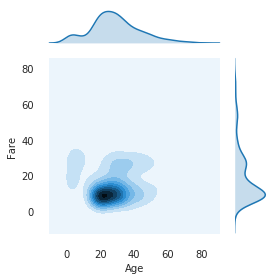

In [20]:
sns.jointplot('Age', 'Fare', titanic.loc[titanic['Fare']<75,:], kind='kde', height=4)
sns.despine(left=True, bottom=True)
plt.show()